<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading necessary packages

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns


Reading the dataset

In [42]:
market_data = pd.read_csv('/content/Market_Basket_Optimisation.csv',header=None)
market_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
market_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
market_data.shape

(7500, 20)

In [ ]:
market_data.sample(10)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
6536,burgers,eggs,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3099,soup,butter,cider,rice,pet food,french fries,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5399,frozen vegetables,barbecue sauce,chocolate bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6111,turkey,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1531,ground beef,meatballs,salmon,cake,salt,tomato juice,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,parmesan cheese,milk,butter,black tea,eggs,frozen smoothie,light mayo,shampoo,low fat yogurt,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6244,burgers,ground beef,spaghetti,mineral water,french fries,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2488,fresh tuna,frozen vegetables,tomatoes,parmesan cheese,whole wheat pasta,spaghetti,soup,avocado,milk,eggs,cooking oil,honey,yogurt cake,protein bar,fresh bread,magazines,NaN,NaN,NaN,NaN
5703,tomatoes,mineral water,chocolate,avocado,pancakes,rice,chicken,hot dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5860,whole wheat pasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizing the most popular items using wordcloud

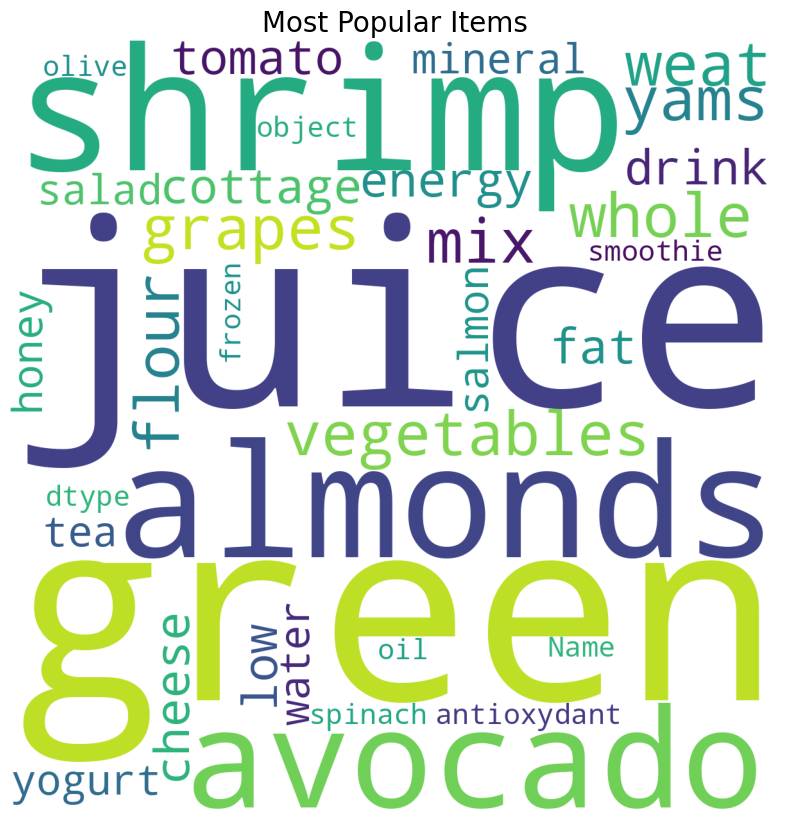

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(market_data.loc[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

Frequency of most popular items

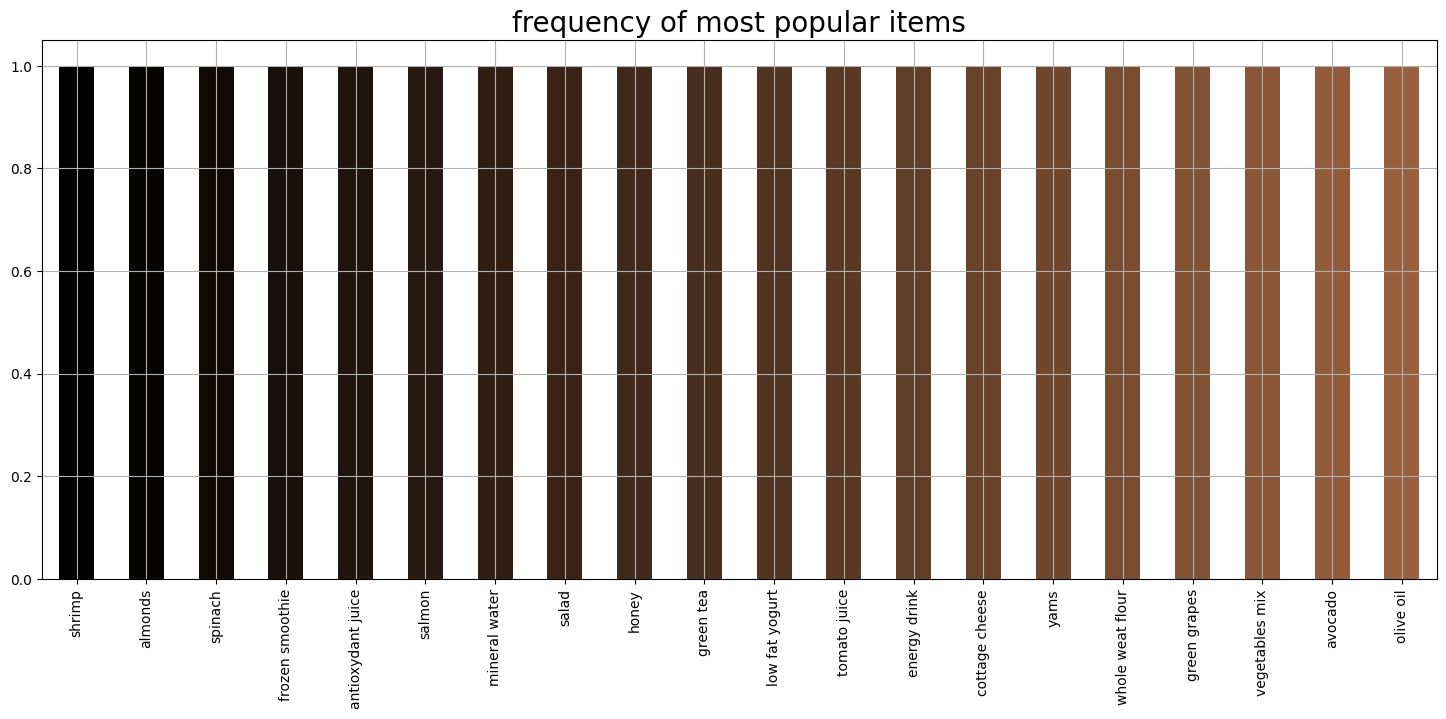

In [45]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
market_data.iloc[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [46]:
y = market_data.iloc[0].value_counts().head(50).to_frame()
y.index

Index(['shrimp', 'almonds', 'spinach', 'frozen smoothie', 'antioxydant juice',
       'salmon', 'mineral water', 'salad', 'honey', 'green tea',
       'low fat yogurt', 'tomato juice', 'energy drink', 'cottage cheese',
       'yams', 'whole weat flour', 'green grapes', 'vegetables mix', 'avocado',
       'olive oil'],
      dtype='object')

Creating a list for each transactions, list of transactions is the input format required by association mining algorithm to perform MBA.
Here each list of transactions represent each row.

In [47]:
market_transactions = []
for index,row in market_data.iterrows():
    transaction = []
    for column in market_data.columns:
      value = row[column]
      if pd.notna(value):
         market_transactions.append(value)
    market_transactions.append(transaction)

for transaction in market_transactions:
  print(transaction)

Streaming output truncated to the last 5000 lines.
[]
black tea
green tea
light mayo
[]
grated cheese
herb & pepper
whole wheat pasta
pancakes
oil
[]
frozen vegetables
[]
tomatoes
parmesan cheese
vegetables mix
eggs
barbecue sauce
cookies
[]
shrimp
frozen vegetables
eggs
french fries
energy drink
[]
ham
red wine
spaghetti
mineral water
eggs
light mayo
[]
green tea
[]
red wine
mineral water
almonds
rice
green tea
[]
ground beef
cooking oil
toothpaste
[]
herb & pepper
ground beef
mineral water
flax seed
[]
cookies
hot dogs
[]
olive oil
butter
cake
cooking oil
cereals
pancakes
white wine
low fat yogurt
[]
frozen vegetables
milk
eggs
green tea
[]
frozen vegetables
mineral water
eggs
[]
cake
[]
frozen vegetables
meatballs
whole wheat rice
light cream
[]
chicken
energy drink
[]
pickles
mineral water
hand protein bar
[]
ham
tomatoes
mineral water
french fries
low fat yogurt
[]
turkey
burgers
eggs
french fries
shallot
energy drink
green tea
[]
burgers
french fries
[]
frozen vegetables
pepper
m

Converting data into binary matrix format using TransactionEncoder to perform exploratory analysis

In [49]:
transaction = []
for i in range(0,7501):
  transaction.append([str(market_data.values[i,j]) for j in range(0,20)])
trans = np.array(transaction)
print(trans.shape)

(7501, 20)


In [50]:
encoder = TransactionEncoder()
to_array = encoder.fit_transform(trans)
df_transactions = pd.DataFrame(to_array,columns=encoder.columns_)
print(df_transactions)

       asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0          False     True               True      False     True        False   
1          False    False              False      False    False        False   
2          False    False              False      False    False        False   
3          False    False              False      False     True        False   
4          False    False              False      False    False        False   
...          ...      ...                ...        ...      ...          ...   
7496       False    False              False      False    False        False   
7497       False    False              False      False    False        False   
7498       False    False              False      False    False        False   
7499       False    False              False      False    False        False   
7500       False    False              False      False    False        False   

      bacon  barbecue sauce

In [43]:
market_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


Performing association mining using apriori

In [54]:
frequent_itemsets = apriori(df_transactions,min_support= 0.01,use_colnames = True)
print(frequent_itemsets)

      support                                      itemsets
0    0.020397                                     (almonds)
1    0.033329                                     (avocado)
2    0.010799                              (barbecue sauce)
3    0.014265                                   (black tea)
4    0.011465                                  (body spray)
..        ...                                           ...
510  0.011065       (mineral water, ground beef, nan, milk)
511  0.017064  (mineral water, nan, spaghetti, ground beef)
512  0.015731         (mineral water, nan, spaghetti, milk)
513  0.010265    (mineral water, nan, spaghetti, olive oil)
514  0.011465     (mineral water, nan, pancakes, spaghetti)

[515 rows x 2 columns]


In [55]:
rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.2)
print(rules)

                              antecedents           consequents  \
0                               (almonds)                 (nan)   
1                               (avocado)       (mineral water)   
2                               (avocado)                 (nan)   
3                        (barbecue sauce)                 (nan)   
4                             (black tea)                 (nan)   
..                                    ...                   ...   
739        (mineral water, pancakes, nan)           (spaghetti)   
740  (mineral water, spaghetti, pancakes)                 (nan)   
741            (nan, spaghetti, pancakes)       (mineral water)   
742             (mineral water, pancakes)      (nan, spaghetti)   
743                 (spaghetti, pancakes)  (mineral water, nan)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.020397            0.999867  0.020264    0.993464  0.993597   
1              0.033329            0.